In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

## Identificacion de clusters en nuestro dataset

In [6]:
processed_path = '../data/processed/processed_data_energy.csv'
df = pd.read_csv(processed_path)
df.head()

,hora,dia,mes,anio,tmax-cab,tmax-hmo,tmax-obr,tmax-lmo,tmax-cul,tmin-cab,...,martes_postfestivo,semana_santa,1_mayo,10_mayo,16_sep,2_nov.,pre-navidad_y_new_year,navidad_y_new_year,post-navidad_y_new_year,demanda_energia
0,0,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1394
1,1,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1297
2,2,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1255
3,3,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1222
4,4,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1168


Antes de poder analizar nuestro dataset, es necesario estandarizar los datos, para evitar problemas debido a la diferencia de magnitudes en los valores.

In [5]:
X = np.array(df)

In [9]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Para una mayor facilidad de visualización, utilizaremos PCA para obtener los componentes principales de nuestros datos, y así mas tarde visulizar los clusters mas facilmente.

In [10]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [37]:
kmeans = KMeans(
    n_clusters= 5, #intentamos con 5 clusters, ya que tenemos medidas de temperaturas de 5 ciudades diferentes, 
    )

labels = kmeans.fit_predict(X_pca)

Una vez generado nusetro objeto de KMeans, podemos tratar de visualizar los clusters generados, utilizando los dos primeros componentes generales:

In [31]:
labels_dict = {
    0: 'cyan',
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'magenta'
}

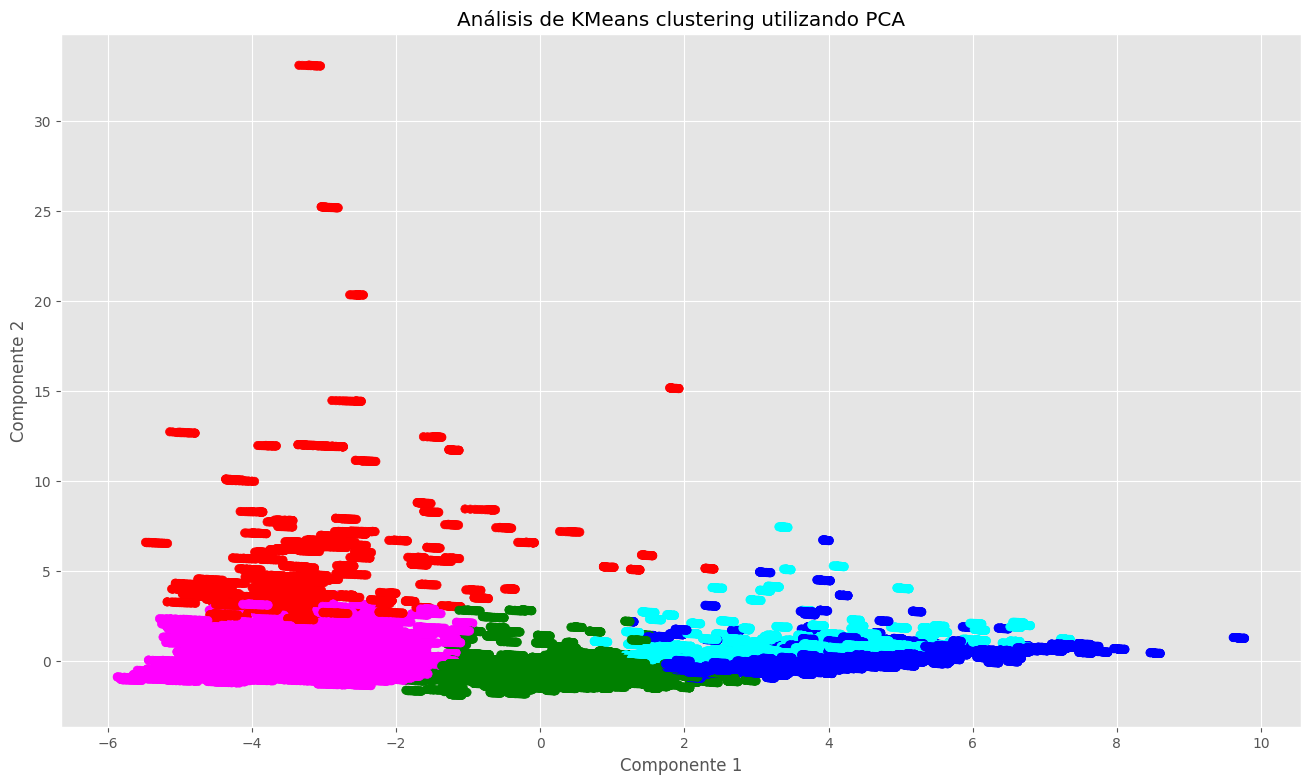

In [53]:
fig, ax = plt.subplots(figsize = (16,9))

ax.scatter(
    x = X_pca[:,0], 
    y = X_pca[:,1],
    c = [labels_dict[v] for v in kmeans.labels_]
    )

ax.set_ylabel('Componente 2')
ax.set_xlabel('Componente 1')
ax.set_title('Análisis de KMeans clustering utilizando PCA')

plt.show()

En este diagrama, podemos apreciar que nuestros datos podrían ser separados en al menos 5 clusters, aunque también podemos apreciar una posible confusión entre estos (en este caso, entre el cluster `cyan` y `azul`)